# 1. Image Classification with the MNIST Dataset

### Importing libraries

In [1]:
! pip install torch torchvision matplotlib

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

# Visualization tools
import torchvision
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

### checking the cpu availabiltiy

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

False

## Training and Validation Data and Label

#### Loading the Data Into Memory (with Keras)

In [4]:
train_set=torchvision.datasets.MNIST('./data/', train=True, download=True)
valid_set=torchvision.datasets.MNIST('./data/', train=False, download=True)

In [5]:
train_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train

In [6]:
valid_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test

#### Exploring the MNIST Data

In [7]:
x_0, y_0 = train_set[0]

In [8]:
x_0

In [9]:
type(x_0)

PIL.Image.Image

In [10]:
y_0

5

In [11]:
type(y_0)

int

##### Transforming Pill image to tensor image

In [12]:
trans = transforms.Compose([transforms.ToTensor()])
x_0_tensor = trans(x_0)

c:\Users\voutl\.conda\envs\myenv\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [13]:
x_0_tensor.dtype

torch.float32

##### verifying Minimum and Maximum value

In [14]:
x_0_tensor.min()

tensor(0.)

In [15]:
x_0_tensor.max()

tensor(1.)

#### Size

In [16]:
x_0_tensor.size()

torch.Size([1, 28, 28])

In [17]:
x_0_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

updating to cpu

In [18]:
x_0_tensor.device

device(type='cpu')

Checking the cpu

In [19]:
x_0_tensor.to(device).device

device(type='cpu')

Checking the targeted Image

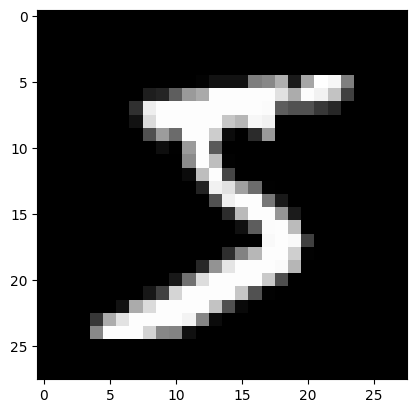

In [20]:
image = F.to_pil_image(x_0_tensor)
plt.imshow(image, cmap='gray')

### Preparing the Data for Training

### Transformations

In [21]:
trans = transforms.Compose([transforms.ToTensor()])

In [22]:
train_set.transform = trans
valid_set.transform = trans

### Data Loaders

In [23]:
batch_size = 32

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size)

### Model Creation

In [24]:
layers = []
layers

[]

#### Flattening the Image cozz it's in 3D

In [25]:
test_matrix = torch.tensor(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
)
test_matrix

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [26]:
nn.Flatten()(test_matrix)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [27]:
batch_test_matrix = test_matrix[None, :]
batch_test_matrix

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [28]:
nn.Flatten()(batch_test_matrix)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [29]:
nn.Flatten()(test_matrix[:, None])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [30]:
layers = [
    nn.Flatten()
]
layers

[Flatten(start_dim=1, end_dim=-1)]

The Input Layer

Our first layer of neurons connects our flattened image to the rest of our model. 

In [31]:
input_size = 1 * 28 * 28

In [ ]:
layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),  # Input
    nn.ReLU(),  # Activation for input
]
layers 

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU()]

adding another set of neurons can help improve learning 

####  The Hidden Layer

In [33]:
layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),  # Input
    nn.ReLU(),  # Activation for input
    nn.Linear(512, 512),  # Hidden
    nn.ReLU()  # Activation for hidden
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU()]

#### Output layer

In [34]:
n_classes = 10

layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),  # Input
    nn.ReLU(),  # Activation for input
    nn.Linear(512, 512),  # Hidden
    nn.ReLU(),  # Activation for hidden
    nn.Linear(512, n_classes)  # Output
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=10, bias=True)]

Compilation

In [35]:
model = nn.Sequential(*layers)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

#### Saving the model

In [36]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [37]:
next(model.parameters()).device

device(type='cpu')

In [38]:
model = torch.compile(model)

 ### Training the Model

### Loss and Optimization

In [39]:
loss_function = nn.CrossEntropyLoss()

In [40]:
optimizer = Adam(model.parameters())

### Calculating Accuracy

In [41]:
train_N = len(train_loader.dataset)
valid_N = len(valid_loader.dataset)

In [42]:
def get_batch_accuracy(output, y, N):
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

#### The Train Function

In [43]:
def train():
    loss = 0
    accuracy = 0

    model.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        output = model(x)
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, train_N)
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

#### The Validate Function

In [44]:
def validate():
    loss = 0
    accuracy = 0

    model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
            output = model(x)

            loss += loss_function(output, y).item()
            accuracy += get_batch_accuracy(output, y, valid_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

Training

In [ ]:
epochs = 5

for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train()
    validate()

Epoch: 0
Train - Loss: 378.4847 Accuracy: 0.9382
Valid - Loss: 33.6033 Accuracy: 0.9661
Epoch: 1
Train - Loss: 153.9010 Accuracy: 0.9737
Valid - Loss: 24.0806 Accuracy: 0.9758
Epoch: 2
Train - Loss: 109.0476 Accuracy: 0.9813
Valid - Loss: 24.2883 Accuracy: 0.9757
Epoch: 3
Train - Loss: 82.4053 Accuracy: 0.9860
Valid - Loss: 23.3197 Accuracy: 0.9800
Epoch: 4
Train - Loss: 64.9619 Accuracy: 0.9886
Valid - Loss: 24.6271 Accuracy: 0.9809


In [ ]:
prediction = model(x_0_gpu)
prediction

tensor([[-46.2784, -26.4004, -27.3332,   4.7242, -50.2941,  25.5521, -27.8682,
-41.5589, -20.8024, -19.4998]], device='cuda:0',
grad_fn=<CompiledFunctionBackward>)


In [ ]:
prediction.argmax(dim=1, keepdim=True)

tensor([[5]], device='cuda:0')


In [ ]:
y_0

5
